**Importing Libraries**





In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import kaleido

**Loading Dataset**


In [69]:
data = pd.read_csv("/content/DataSet1 .csv")

In [70]:
data.describe

<bound method NDFrame.describe of     Age Profession Marrital Status      Education  No of Dependents  \
0    27   Salaried          Single  Post Graduate                 0   
1    35   Salaried         Married  Post Graduate                 2   
2    45   Business         Married       Graduate                 4   
3    41   Business         Married  Post Graduate                 3   
4    31   Salaried         Married  Post Graduate                 2   
..  ...        ...             ...            ...               ...   
94   27   Business          Single       Graduate                 0   
95   50   Salaried         Married  Post Graduate                 3   
96   51   Business         Married       Graduate                 2   
97   51   Salaried         Married  Post Graduate                 2   
98   51   Salaried         Married  Post Graduate                 2   

   Personal loan  Total Salary    Price  
0            Yes        800000   800000  
1            Yes       200000

**Checking For Null value**

In [71]:
print(pd.isnull(data).sum())

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
Total Salary        0
Price               0
dtype: int64


In [72]:
data.rename(columns={'Personal loan':'Car_Loan'},inplace=True)
data.rename(columns={'Price':'EV_Price'},inplace=True)
data.head()


,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


**Count plot of marrital status and car loan**

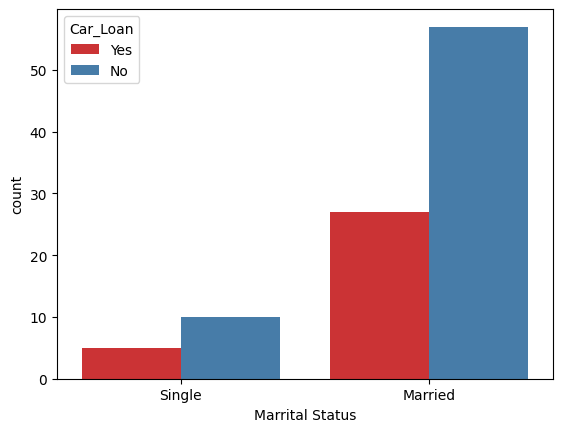

In [73]:
sns.countplot(x ='Marrital Status', hue = 'Car_Loan',  data = data, palette = 'Set1')
plt.show()

In [74]:
(data['Marrital Status'].value_counts()['Married'])/((data['Marrital Status'].value_counts()['Married'])+(data['Marrital Status'].value_counts()['Single']))*100

84.84848484848484

**Pie Chart Of car percentage of car loan required and car loan not required**

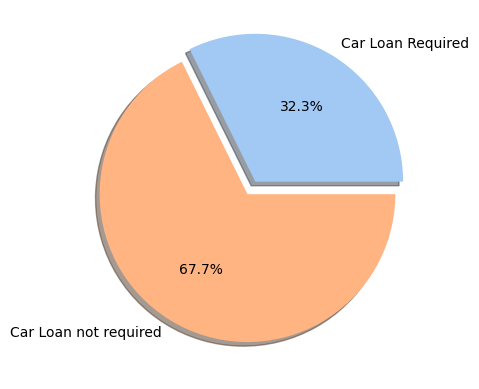

In [75]:
labels = ['Car Loan Required','Car Loan not required']
Loan_status = [data.query('Car_Loan == "Yes"').Car_Loan.count(),data.query('Car_Loan == "No"').Car_Loan.count()]
explode = [0.1, 0]
palette_color = sns.color_palette('pastel')
plt.pie(Loan_status, labels=labels, colors=palette_color, shadow = "True",
        explode=explode, autopct='%1.1f%%')
plt.show()

**Frequency of each entry for consumer features - Age, No. 0f Dependents, Total Salary**

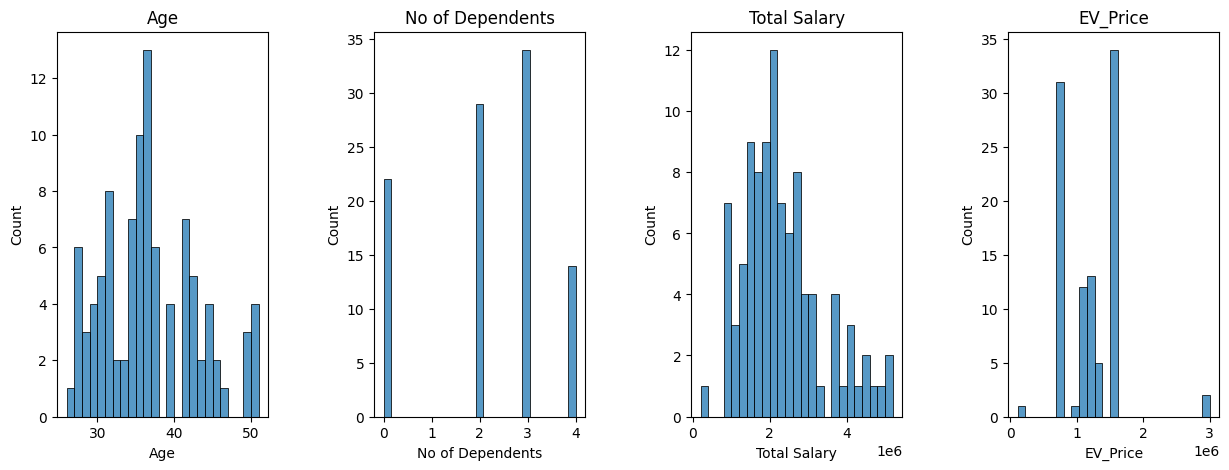

In [76]:
plt.figure(1, figsize=(15,5))
n=0

for x in ['Age', 'No of Dependents' ,'Total Salary'  ,'EV_Price']:
  n += 1
  plt.subplot(1,4,n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.histplot(data[x], bins= 25)
  plt.title(f'{x}')
plt.show()

In [77]:
from kmodes.kprototypes import KPrototypes

In [78]:
data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


In [79]:
cluster_features = list(data.columns)
cluster_data = data[cluster_features].values

In [80]:
cluster_data[:, 0]

array([27, 35, 45, 41, 31, 28, 31, 33, 34, 34, 35, 35, 29, 30, 31, 49, 26,
       27, 29, 30, 37, 35, 36, 35, 35, 35, 35, 36, 36, 36, 41, 41, 41, 43,
       42, 42, 29, 30, 30, 31, 31, 32, 32, 34, 34, 34, 36, 36, 36, 36, 49,
       49, 44, 44, 41, 41, 41, 27, 27, 28, 28, 30, 31, 31, 31, 39, 39, 39,
       39, 37, 37, 37, 37, 35, 36, 36, 36, 36, 44, 45, 46, 44, 43, 42, 42,
       42, 29, 33, 34, 34, 35, 36, 37, 27, 27, 50, 51, 51, 51],
      dtype=object)

In [81]:
cluster_data[:, 0] = cluster_data[:, 0].astype(float)
cluster_data[:, 4] = cluster_data[:, 4].astype(float)
cluster_data[:, 6] = cluster_data[:, 6].astype(float)
cluster_data[:, 7] = cluster_data[:, 7].astype(float)

**Finding optimal number of clusters for KPrototypes**

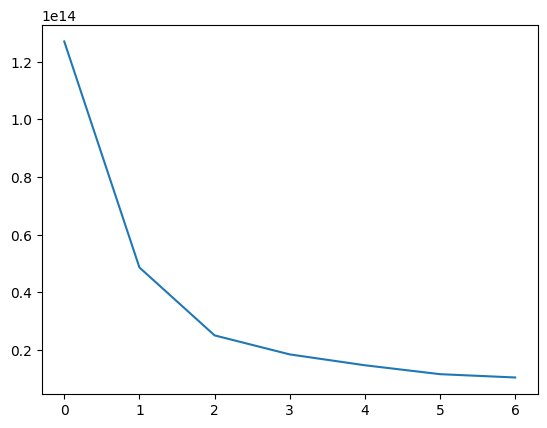

In [82]:
cost = []
for num_clusters in list(range(1,8)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(cluster_data, categorical=[1,2,3,5])
    cost.append(kproto.cost_)

plt.plot(cost)

In [83]:
cost

[126979657487180.34,
 48631729380526.18,
 25087753148183.234,
 18491809410726.285,
 14728855794095.537,
 11636836256958.104,
 10492244742952.799]

**Fitting data to clusters**

In [84]:
kproto = KPrototypes(n_clusters=2, verbose=2,max_iter=20)
clusters = kproto.fit_predict(cluster_data, categorical=[1,2,3,5])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 18, ncost: 50683794617780.36
Run: 1, iteration: 2/20, moves: 4, ncost: 50057040964014.66
Run: 1, iteration: 3/20, moves: 1, ncost: 50020391397205.32
Run: 1, iteration: 4/20, moves: 0, ncost: 50020391397205.32
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 9, ncost: 50057040964014.66
Run: 2, iteration: 2/20, moves: 1, ncost: 50020391397205.32
Run: 2, iteration: 3/20, moves: 0, ncost: 50020391397205.32
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 3, ncost: 50057040964014.66
Run: 3, iteration: 2/20, moves: 1, ncost: 50020391397205.32
Run: 3, iteration: 3/20, moves: 0, ncost: 50020391397205.32
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run

**Appending the cluster data**

In [85]:
data['Cluster'] = clusters

**Average cost of Ev**

In [86]:
data.EV_Price.mean()

1194040.4040404041

**Average cost of a car in segment 1**

In [87]:
data.EV_Price[data.Cluster==0].mean()

1021267.6056338028

In [88]:
data['EV_Price'][data.Cluster==1].max()

3000000

**Average cost of a car in segment 1**

In [89]:
data.EV_Price[data.Cluster==1].mean()

1632142.857142857

In [90]:
data['Cluster'].value_counts(normalize=True) * 100

0    71.717172
1    28.282828
Name: Cluster, dtype: float64

**Segregrating each cluster**

In [91]:
Cluster_0 = data[data.Cluster==0]
Cluster_1 = data[data.Cluster==1]

In [92]:
data['Cluster'].value_counts()

0    71
1    28
Name: Cluster, dtype: int64

**Plotting the effect of salary and ev price on cluster data**

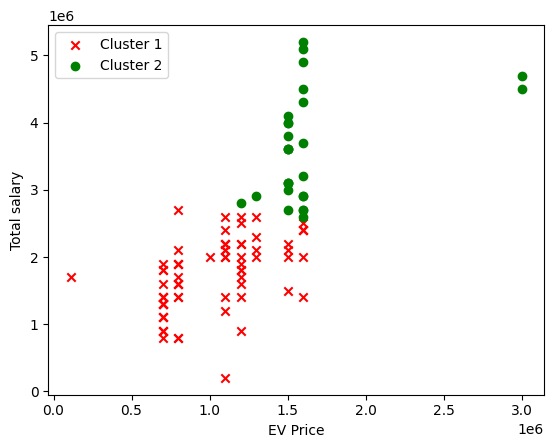

In [93]:
plt.scatter(Cluster_0.EV_Price, Cluster_0['Total Salary'],color='red', marker = 'x', label = 'Cluster 1')
plt.scatter(Cluster_1.EV_Price, Cluster_1['Total Salary'],color='green', label = 'Cluster 2')
plt.legend(loc="upper left")

plt.xlabel('EV Price')
plt.ylabel('Total salary')
plt.show()

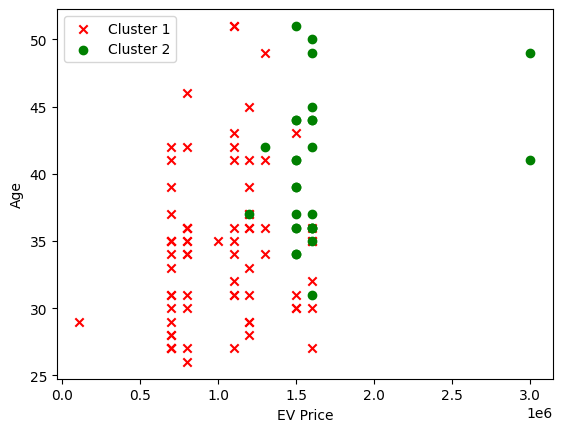

In [94]:
plt.scatter(Cluster_0.EV_Price, Cluster_0['Age'],color='red', marker = 'x', label = 'Cluster 1')
plt.scatter(Cluster_1.EV_Price, Cluster_1['Age'],color='green', label = 'Cluster 2')
plt.legend(loc = "upper left")

plt.xlabel('EV Price')
plt.ylabel('Age')
plt.show()

In [95]:
from mpl_toolkits.mplot3d import Axes3D

**Plotting influence of age**

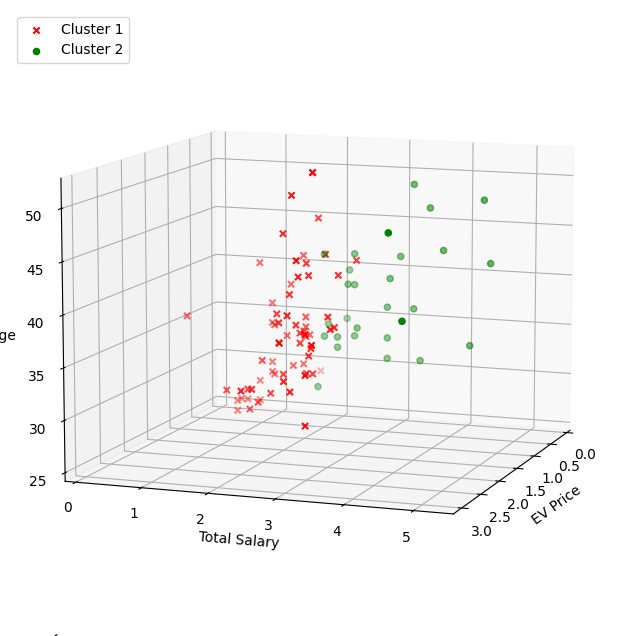

In [96]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(Cluster_0.EV_Price, Cluster_0['Total Salary'], Cluster_0['Age'], color='red', marker = 'x', label = 'Cluster 1')
ax.scatter(Cluster_1.EV_Price, Cluster_1['Total Salary'],Cluster_1['Age'], color='green', label = 'Cluster 2')
plt.legend(loc = 'upper left')

ax.view_init(10, 20)

plt.xlabel("EV Price")
plt.ylabel("Total Salary")
ax.set_zlabel('Age')
plt.show()


**Plotting influence of No of Dependents**

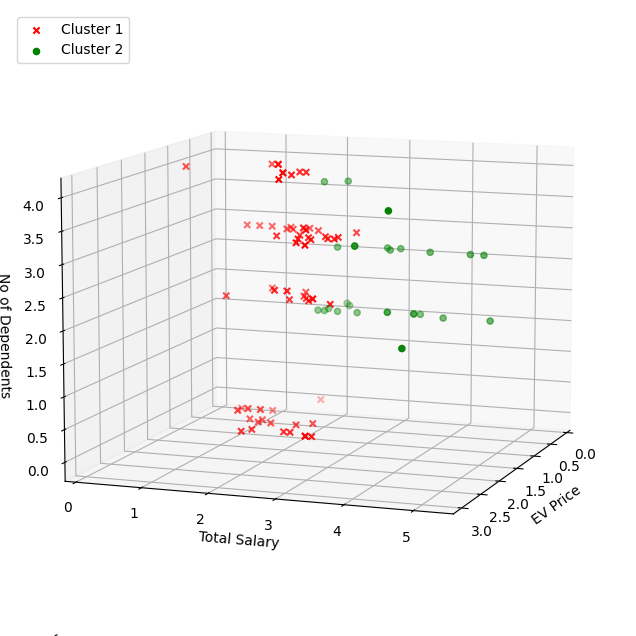

In [97]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(Cluster_0.EV_Price, Cluster_0['Total Salary'], Cluster_0['No of Dependents'], color='red', marker = 'x', label = 'Cluster 1')
ax.scatter(Cluster_1.EV_Price, Cluster_1['Total Salary'],Cluster_1['No of Dependents'], color='green', label = 'Cluster 2')
plt.legend(loc = 'upper left')
ax.view_init(10,20)

plt.xlabel("EV Price")
plt.ylabel("Total Salary")
ax.set_zlabel('No of Dependents')
plt.show()

In [98]:
data['No of Dependents'].value_counts()

3    34
2    29
0    22
4    14
Name: No of Dependents, dtype: int64

**Plotting the effct of no of dependents and ev price on cluster data**

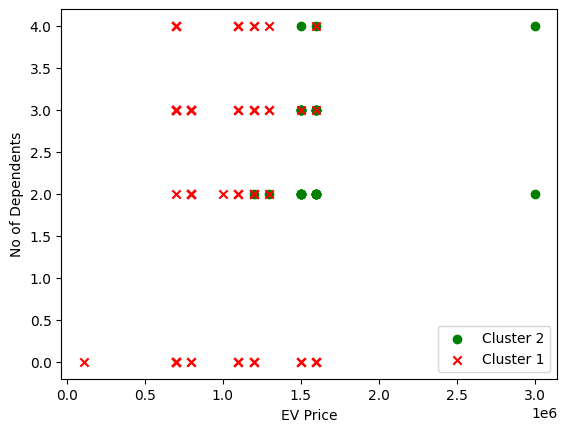

In [99]:
# plotting the effct of no of dependents and ev price on cluster data


plt.scatter(Cluster_1.EV_Price, Cluster_1['No of Dependents'],color='green', label = 'Cluster 2')
plt.scatter(Cluster_0.EV_Price, Cluster_0['No of Dependents'],color='red', marker = 'x', label = 'Cluster 1')
plt.legend(loc="lower right")

plt.xlabel('EV Price')
plt.ylabel('No of Dependents')
plt.show()